<a href="https://colab.research.google.com/github/mayaarosama/Machine-Learning-fundamentals/blob/main/ML_Lab2_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction on Linear Regression on Single Variable

 ***Linear regression*** is a fundamental statistical method used to model the relationship between a `dependent variable` and `one or more independent variables` . The primary goal is to find a linear equation that best predicts the dependent variable based on the values of the independent variables.





In [ ]:
# Data
x = [2, 3, 4, 5, 6]
y = [50, 60, 70, 80, 90]


We'll calculate the slope $\beta_1$ and the intercept $\beta_0$ using the least squares method.

## Steps for Manual Calculation



1. **Calculate the Means of x and y**:

    $
   \bar{x} = \frac{1}{n} \sum_{i=1}^n x_i$

   $\bar{y} = \frac{1}{n} \sum_{i=1}^n y_i$


In [ ]:

# Number of observations
n = len(x)

# Calculate means
mean_x = sum(x) / n
mean_y = sum(y) / n



2. **Calculate the Slope $beta_1$**:

   $
   \beta_1 = \frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^n (x_i - \bar{x})^2}
   $




In [ ]:

# Calculate the slope (beta_1)
numerator = sum((xi - mean_x) * (yi - mean_y) for xi, yi in zip(x, y))
denominator = sum((xi - mean_x) ** 2 for xi in x)
beta_1 = numerator / denominator


Note: `zip(x, y)` creates an iterator of tuples where the first item in each passed iterator is paired together, and then the second item in each passed iterator is paired together, and so on. For the given lists x = [2, 3, 4, 5, 6] and y = [50, 60, 70, 80, 90], zip(x, y) will produce:

[(2,50),(3,60),(4,70),(5,80),(6,90)]

3. **Calculate the Intercept $\beta_0$**:

   $
   \beta_0 = \bar{y} - \beta_1 \bar{x}
   $



In [ ]:

# Calculate the intercept (beta_0)
beta_0 = mean_y - beta_1 * mean_x




4. **Form the Regression Equation**:
  
  $
   y = \beta_0 + \beta_1 x
   $

In [ ]:
# Print the regression equation
print(f"Regression equation: y = {beta_0:.2f} + {beta_1:.2f}x")

# Predict values using the manual model
y_pred = [beta_0 + beta_1 * xi for xi in x]


Visualizing the model

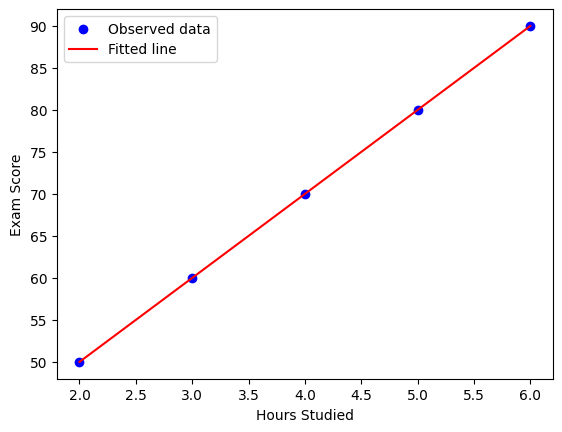

In [ ]:

# Plot the data and the regression line
import matplotlib.pyplot as plt

plt.scatter(x, y, color='blue', label='Observed data')
plt.plot(x, y_pred, color='red', label='Fitted line')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.legend()
plt.show()


## Using Sklean

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


# Data
x = np.array(x).reshape(-1, 1)
y = np.array(y)
# Create a linear regression model
model = LinearRegression()
model.fit(x, y)


Getting the intecept ($\beta_0$) and the slope ($\beta_1$)

In [ ]:

# Get the model parameters
intercept = model.intercept_
slope = model.coef_[0]

# Print the regression equation
print(f"Regression equation: y = {intercept:.2f} + {slope:.2f}x")

# Predict values
y_pred = model.predict(x)


Plot the results

In [ ]:

# Plot the data and the regression line
plt.scatter(x, y, color='blue', label='Observed data')
plt.plot(x, y_pred, color='red', label='Fitted line')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.legend()
plt.show()

# Linear Regression on Multiple Variables


For this part we will use the [Medical Cost Personal Datasets](https://www.kaggle.com/datasets/mirichoi0218/insurance) from Kaggle to practice what we learned

In [1]:
!unzip *.zip

Archive:  archive (2).zip
  inflating: insurance.csv           


In [2]:

import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as pl
import seaborn as sns

data = pd.read_csv('insurance.csv')


In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
from sklearn.preprocessing import LabelEncoder
#sex
le = LabelEncoder()
le.fit(data.sex.drop_duplicates())
data.sex = le.transform(data.sex)
# smoker or not
le.fit(data.smoker.drop_duplicates())
data.smoker = le.transform(data.smoker)
#region
le.fit(data.region.drop_duplicates())
data.region = le.transform(data.region)

In [6]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


The Pearson correlation coefficient, often referred to simply as the Pearson correlation or the Pearson $r$, is a measure of the linear relationship between two variables. It ranges from [-1,1], where:

- 1 indicates a perfect positive linear relationship,
- -1 indicates a perfect negative linear relationship, and
- 0 indicates no linear relationship.


The formula for calculating the Pearson correlation coefficient between two variables  $X$ and $Y$ is:

  $ r = \frac{\sum_{i=1}^{n} (X_i - \overline{X})(Y_i - \overline{Y})}{\sqrt{\sum_{i=1}^{n} (X_i - \overline{X})^2 \sum_{i=1}^{n} (Y_i - \overline{Y})^2}} $

where:
- $n$  is the number of data points,
- $X_i$ and $Y_i$ are the individual data points,
- $\overline{X}$ is the mean of the $X$ values,
- $\overline{Y}$ is the mean of the $Y$ values.


- *$r = 1$*: Perfect positive correlation. As $ X$ increases, $ Y$ increases proportionally.
- *$r = -1$*: Perfect negative correlation. As$ X$  increases, $ Y$ decreases proportionally.
- *$ 0 < r < 1 $*: Positive correlation. As$ X$  increases,$ Y$ tends to increase.
- *$-1 < r < 0 $*: Negative correlation. As $ X$  increases, $ Y$ tends to decrease.
- *$r = 0 $*: No linear correlation. Changes in $ X$  do not predict changes in $ Y$.

In [ ]:
data.corr()['charges'].sort_values()

region     -0.006208
sex         0.057292
children    0.067998
bmi         0.198341
age         0.299008
smoker      0.787251
charges     1.000000
Name: charges, dtype: float64

Try it yoursef on [Simple Salary Prediction Dataset](https://www.kaggle.com/datasets/abhishek14398/salary-dataset-simple-linear-regression)

# Resources and lab refrences
1. https://scikit-learn.org/stable/modules/linear_model.html
2. https://www.youtube.com/watch?v=owI7zxCqNY0
3. https://www.kaggle.com/code/sudhirnl7/linear-regression-tutorial
4. https://www.geeksforgeeks.org/ml-linear-regression/